#### Author : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : LetsGrowMore
#### Batch : MARCH 2023
#### Task 2-STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM
####                                                (BEGINNER LEVEL)
#### Problem Statement:
*  Use LSTM (Long Short-Term Memory) approach to predict stock market indices on the given dataset.


In [ ]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#importing tensorflow
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
#importing Data
data_frame=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [ ]:
# Understanding the dimensions of data
data_frame.shape

(2035, 8)

In [ ]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data_frame.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

* Columns are Open , High, Low, Last , Close, Total Trade Quantity,Turnover  in Lacs and the corresponding Dates.

In [ ]:
# Show the top 5 Rows of data
data_frame.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data_frame.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
#Finding the period of time of stock data available
print('Stock data starting date: ', data_frame["Date"].min())
print('Stock data ending date: ', data_frame["Date"].max())

Stock data starting date:  2010-07-21
Stock data ending date:  2018-09-28


* Time frame of Stock market data is from 21st July 2010 to 28th September 2018

In [ ]:
# Arrange in terms of date
data_frame.set_index("Date",inplace=True)
data_frame.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# Performing Descriptive Analysis
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


* Most of the values in Open, close, high , low and last are similar 

In [ ]:
# Checking for null values
data_frame.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

DATA VISUALISATION

In [ ]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()
df_corr

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


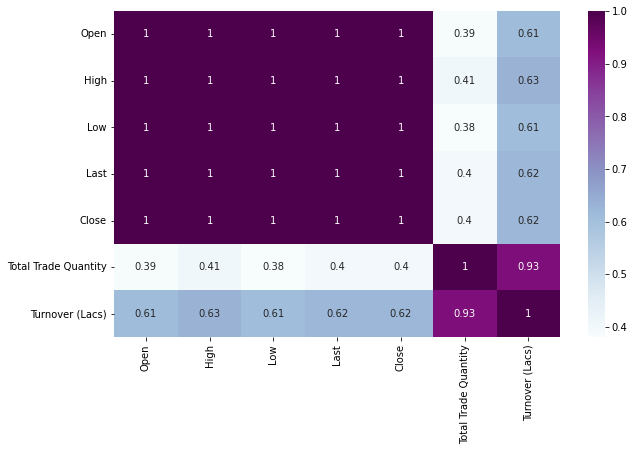

In [ ]:
# Plotting Heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

* Most of the values are highly correlated with each other

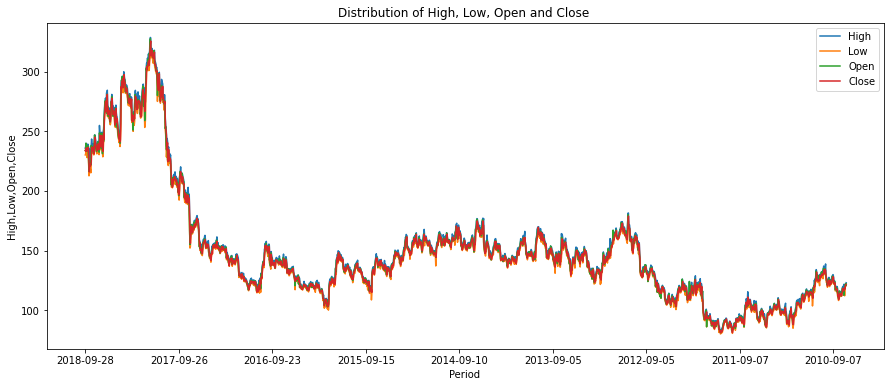

In [ ]:
# Plotting the distribution of High, Low , Open and Close variables
data_frame[["High", "Low", "Open", "Close"]].plot(figsize=(15,6))
plt.xlabel("Period ")
plt.ylabel("High,Low,Open,Close")
plt.title("Distribution of High, Low, Open and Close ")
plt.legend(loc="best")

* Here values in Close, Open, High and Low follows similar pattern. So for furthur analysis, Values in 'Close' are only taken.

In [ ]:
# Taking the Close variable for further analysis
data_frame_column_Close=data_frame.reset_index()['Close']
print(data_frame_column_Close)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


#### Plotting distribution of Close variable 

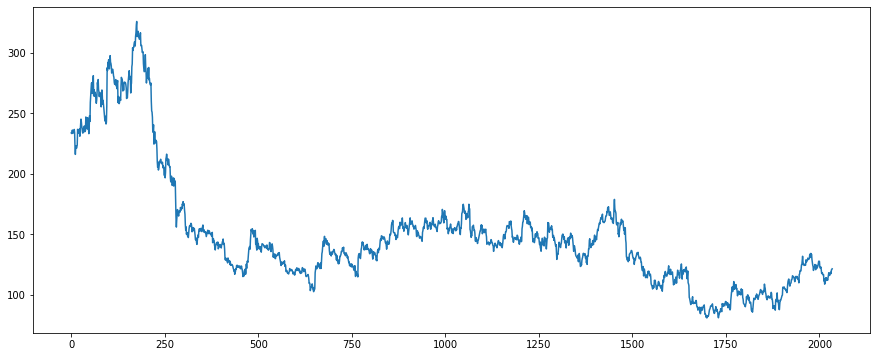

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data_frame_column_Close)
plt.show()

In [ ]:
# Min Max Scaling transforms data by scaling features to a range between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_frame_column_Close=scaler.fit_transform(np.array(data_frame_column_Close).reshape(-1,1))
data_frame_column_Close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
# Print Length of train and test dataset
# Train size is taken as 0.75 of total dataset
train_size=int(len(data_frame_column_Close)*0.75)
test_size=len(data_frame_column_Close)-train_size
length=len(data_frame_column_Close)
print('Train size: ', train_size)
print('Test size: ', test_size)

Train size:  1526
Test size:  509


In [ ]:
# Splitting into train and test data set
train_data,test_data=data_frame_column_Close[0:train_size,:],data_frame_column_Close[train_size:length,:1]
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [ ]:
# Defining the function stock_close for differentiating feature and target variable
def stock_close(x, step=1):
	feature,target = [], []

	for i in range(len(x)-step):
		tmp_x = x[i:i+step, 0]   
		feature.append(tmp_x)
		target.append(x[i + step, 0])
	return np.array(feature), np.array(target)

In [ ]:
# Defining train and test data
X_train, y_train = stock_close(train_data, 100)
X_test, ytest = stock_close(test_data, 100)


In [ ]:
# Printing dimensions of train dataset
print(X_train.shape), print(y_train.shape)

(1426, 100)
(1426,)


(None, None)

In [ ]:
# Printing dimensions of test dataset
print(X_test.shape), print(ytest.shape)

(409, 100)
(409,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#### Building the Neutral Network Model

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#Layers are added to model
# Long short-term memory (LSTM) model is a variation of RNN ( Recurrent Neural Network)
# Stock Prices are highly dependent on time frame
# LSTM capable of processing  long-term dependencies in time-series data. 
# Fully connected layer makes the final prediction.
my_model=Sequential()
my_model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
my_model.add(LSTM(32))
my_model.add(Dense(1))

In [ ]:
# Model Compilation
my_model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# Model Summary
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model 
# Epoch refers to one cycle through full training dataset. Here 30 Epochs are used
my_model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
23/23 [==============================] - 7s 120ms/step - loss: 0.0156 - val_loss: 0.0023
Epoch 2/30
23/23 [==============================] - 2s 88ms/step - loss: 0.0016 - val_loss: 7.4410e-04
Epoch 3/30
23/23 [==============================] - 3s 141ms/step - loss: 9.4187e-04 - val_loss: 8.0441e-04
Epoch 4/30
23/23 [==============================] - 4s 178ms/step - loss: 8.6820e-04 - val_loss: 6.5054e-04
Epoch 5/30
23/23 [==============================] - 4s 162ms/step - loss: 8.2532e-04 - val_loss: 6.4264e-04
Epoch 6/30
23/23 [==============================] - 4s 178ms/step - loss: 8.0004e-04 - val_loss: 6.7457e-04
Epoch 7/30
23/23 [==============================] - 4s 178ms/step - loss: 7.6402e-04 - val_loss: 7.4723e-04
Epoch 8/30
23/23 [==============================] - 2s 88ms/step - loss: 7.1909e-04 - val_loss: 5.8255e-04
Epoch 9/30
23/23 [==============================] - 2s 88ms/step - loss: 6.8780e-04 - val_loss: 6.7459e-04
Epoch 10/30
23/23 [========================

#### Prediction

In [ ]:
# Prediction of Close value Prices
X_predict = my_model.predict(X_train)
y_predict = my_model.predict(X_test)
     

13/13 [==============================] - 0s 20ms/step


In [ ]:
# Inverse Transformation
X_predict = scaler.inverse_transform(X_predict)
y_predict = scaler.inverse_transform(y_predict)


In [ ]:
# Printing Predicted values
y_predict

array([[119.30978 ],
       [119.1352  ],
       [118.93488 ],
       [119.23328 ],
       [119.77732 ],
       [120.721466],
       [122.02718 ],
       [122.80714 ],
       [122.31919 ],
       [122.00861 ],
       [121.800934],
       [121.35113 ],
       [121.25036 ],
       [121.15564 ],
       [121.28273 ],
       [121.52492 ],
       [121.781494],
       [122.09341 ],
       [122.10498 ],
       [122.4359  ],
       [122.268425],
       [121.36072 ],
       [120.47241 ],
       [120.11275 ],
       [118.959206],
       [117.45405 ],
       [115.77911 ],
       [113.12759 ],
       [110.21821 ],
       [107.322   ],
       [104.58334 ],
       [102.13592 ],
       [100.20304 ],
       [ 98.90704 ],
       [ 98.02798 ],
       [ 97.90928 ],
       [ 98.36434 ],
       [ 98.663795],
       [ 98.72471 ],
       [ 98.64348 ],
       [ 98.59412 ],
       [ 98.4808  ],
       [ 98.369316],
       [ 98.28434 ],
       [ 98.182175],
       [ 98.31058 ],
       [ 98.46618 ],
       [ 98.2

In [ ]:
# Reshaping train and test values
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])
y_train =y_train.reshape(-1,1) 
ytest = ytest.reshape(-1,1)
# Inverse Transformation
X_test=scaler.inverse_transform(X_test)
X_train=scaler.inverse_transform(X_train)
ytest=scaler.inverse_transform(ytest)   
y_train=scaler.inverse_transform(y_train)  

In [ ]:
# Length of X_train and X_test
lentrain=len(X_train)
lentest=len(X_test)

Text(0.5, 1.0, 'Test Values & Predicted Values along with train values ')

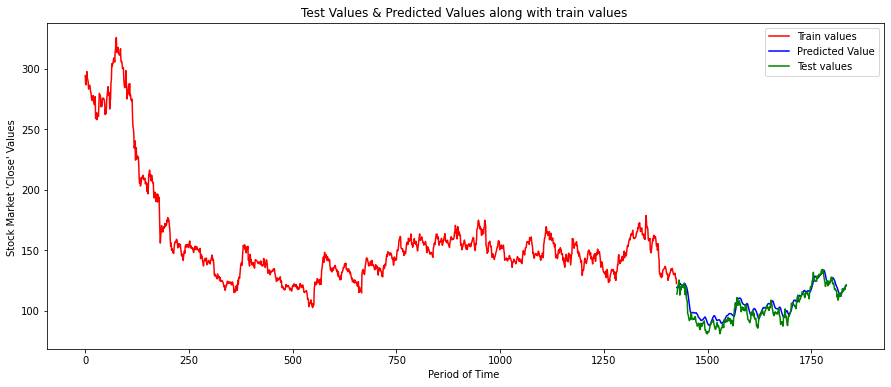

In [ ]:
# Plotting Close value Price including the Predicted and Actual values
plt.figure(figsize=(15,6))
plt.plot(np.arange(0, lentrain), y_train, 'r', label="Train values")

plt.plot(np.arange(lentrain, lentrain + lentest), y_predict, 'b', label="Predicted Value")

plt.plot(np.arange(lentrain, lentrain + lentest), ytest, 'g', label="Test values")
plt.legend(loc="best")

plt.xlabel("Period of Time ")
plt.ylabel("Stock Market 'Close' Values ")
plt.title("Test Values & Predicted Values along with train values ")


#### Test the model

In [ ]:
# Find Mean Sqaured Error
from sklearn.metrics import mean_squared_error , r2_score
mean_squared_error(ytest, y_predict,squared=False)

5.302500636231183

In [ ]:
# Coefficient of Determination or R Squared Value (r2)
r2_score(ytest, y_predict)

0.8474844362001036

--------------------THE END----------------------